# Mid-Term Project

Rishabh Kaushick,   NU ID: 002808996,   kaushick.r@northeastern.edu

College of Engineering, 
Northeastern University
Toronto, ON

In [81]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# loading the data
# structured data
scm_dataset_path = 'data/DataCoSupplyChainDataset.csv'
scm_df = pd.read_csv(scm_dataset_path, encoding='latin-1')

# unstructured data
scm_unstructured_path = 'data/tokenized_access_logs.csv'
scm_unstructured_df = pd.read_csv(scm_unstructured_path)

In [3]:
# Let's see what the first five rows data looks like
scm_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
# total number of rows in the above csv:
scm_df.count()

Type                             180519
Days for shipping (real)         180519
Days for shipment (scheduled)    180519
Benefit per order                180519
Sales per customer               180519
Delivery Status                  180519
Late_delivery_risk               180519
Category Id                      180519
Category Name                    180519
Customer City                    180519
Customer Country                 180519
Customer Email                   180519
Customer Fname                   180519
Customer Id                      180519
Customer Lname                   180511
Customer Password                180519
Customer Segment                 180519
Customer State                   180519
Customer Street                  180519
Customer Zipcode                 180516
Department Id                    180519
Department Name                  180519
Latitude                         180519
Longitude                        180519
Market                           180519


In [5]:
scm_unstructured_df.head()

,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...


In [6]:
scm_unstructured_df.count()

Product       469977
Category      469977
Date          469977
Month         469977
Hour          469977
Department    469977
ip            469977
url           469977
dtype: int64

In the main csv dataset, there are 53 columns and 180,519 rows. Therefore there are 53 X 180,519 = 9,567,507 data points.


However, from the unstructured dataset, we can see that there are 8 columns and 469,977 rows. Therefore there are 8 X 469,977 = 3,759,816 data points.


Since the columns in each of the datasets are different from each other, and since there is a lot more data in the structured dataframe, we will use the same and disregard the unstructured data in this project.

In [13]:
# understanding the number of distinct non null numbers are present in each column
scm_df.nunique()

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Email                        1
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Password                     1
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5


In [14]:
# checking which columns have null rows
scm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

From the above -  we can see that there are null values in the following columns
- Order Zipcode
- Project Description


In [15]:
scm_df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [7]:
# Let's see the type of data in the 'Type' Column
scm_df['Type'].value_counts()

Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x16b985550>,
 [Text(0.428168266257398, 1.1210137982068438, 'DEBIT'),
  Text(-1.1885215498911712, -0.16557936297826523, 'TRANSFER'),
  Text(0.19342361628901053, -1.1843087877161436, 'PAYMENT'),
  Text(1.130752535999951, -0.40174457349126647, 'CASH')])

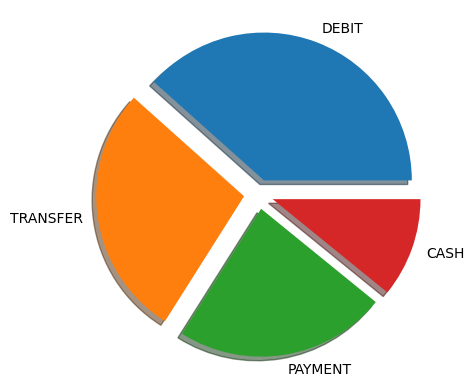

In [8]:
# visualizing the same thing in a pie chart

# Trying to create a plot with each section exploded from the pie.
my_explode = [0.1, 0.1, 0.1, 0.1]
my_labels = np.array(['DEBIT', 'TRANSFER', 'PAYMENT', 'CASH'])
type_value_array = (scm_df['Type'].value_counts())
plt.pie(type_value_array, labels=my_labels, shadow=True, explode=my_explode)

In [9]:
# Delivery Status
scm_df['Delivery Status'].value_counts()

Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64

Text(0.5, 1.0, 'Frequency Distribution of Delivery Status')

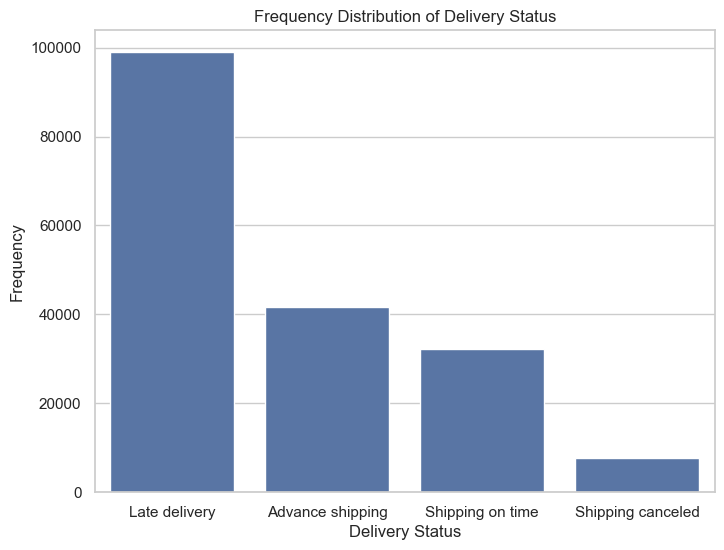

In [10]:
# plotting it in a graph to visualize it better
sns.set(style="whitegrid")
plt.figure(figsize = (8,6))
sns.barplot(scm_df['Delivery Status'].value_counts())
plt.xlabel("Delivery Status")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Delivery Status")

We can see that the Delivery Status for most of the deliveries in the dataset are 'Late delivery'

Let us try to find out more about location data of the customers which result in late delivery.

<Axes: xlabel='Order Region', ylabel='count'>

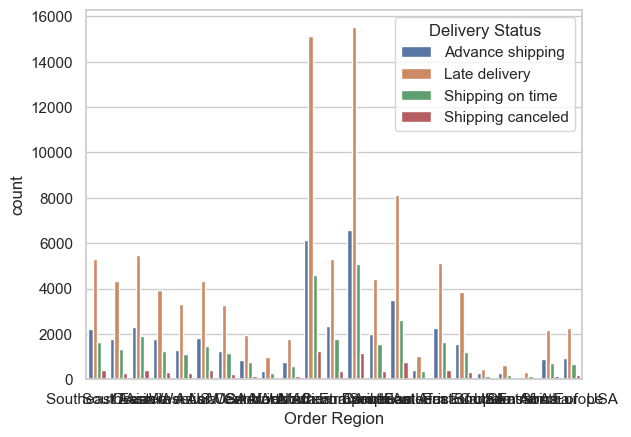

In [71]:
# Plotting geographic data of the customer locations which resulted in Late Delivery
sns.countplot(scm_df, x='Order Region', hue='Delivery Status')


The above plot is not useful since we are unable to see the regions on the x-axis

<Axes: xlabel='Delivery Status', ylabel='count'>

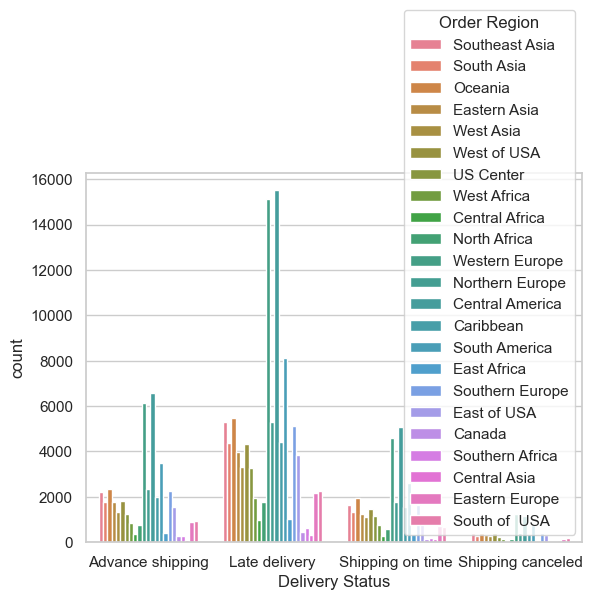

In [77]:
# trying to plot the same figure in a different way
sns.countplot(scm_df, x='Delivery Status', hue='Order Region')

This is better, but it is still hard to read the graph to understand exactly which region has most delivery statuses as 'Late delievry'

In [82]:
# displaying the same data using plotly library
data_delivery_status_region=scm_df.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_delivery_status_region, x='Delivery Status', y='Number of Orders'  , color='Order Region',
       )

In [11]:
# Customer Segment
scm_df['Customer Segment'].value_counts()

Customer Segment
Consumer       93504
Corporate      54789
Home Office    32226
Name: count, dtype: int64

In [12]:
# Market
scm_df['Market'].value_counts()

Market
LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: count, dtype: int64

<Axes: xlabel='Market', ylabel='percent'>

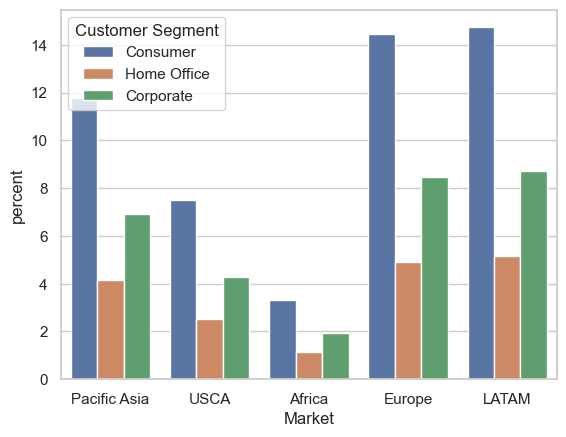

In [45]:
# In each market - finding the customer segment (Consumer, Home Office and Corporate frequencies)
sns.countplot(scm_df, x="Market", hue="Customer Segment", stat="percent", legend="auto")

In [47]:
# Order Status
scm_df['Order Status'].value_counts()

Order Status
COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: count, dtype: int64

<Axes: title={'center': 'ORDER STATUS'}>

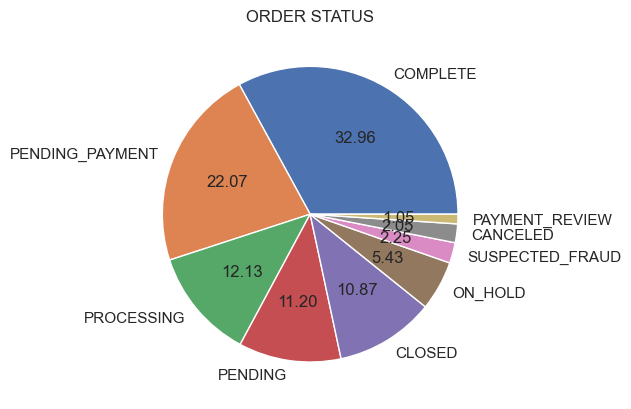

In [61]:
# again visualizing the order status with pie charts
scm_df['Order Status'].value_counts().plot.pie(title='ORDER STATUS',autopct="%.2f",ylabel="")

In [ ]:
# Product Status

In [ ]:
# Shipping Mode

In [ ]:
# columns to remove

In [ ]:
# finding correlations

In [ ]:
# Data Visualization
# plotting multiple features against each other